In [2]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

data = pd.read_csv('DataSetForPhishingVSBenignUrl.csv', header=0)

data.head(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.0769231,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.0588235,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.0606061,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.0408163,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement
5,0,4,8,5.5,14,6.500000,4,22,10,0,0,0,0,0,0,0,0,0,0,91,25,59,59,2,2,2,0.648352,0.021978,0.08,0.274725,2.36,0.0338983,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,78,22,8,13,31,-1,34,14,15,13,-1,0,0,4,0,4,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.666676,0.784493,0.814725,0.755658,0.0,-1.0,Defacement
6,0,4,5,5.5,14,7.800000,4,17,10,0,0,0,0,0,0,0,0,0,0,75,25,43,43,2,2,2,0.573333,0.026667,0.08,0.333333,1.72,0.0465116,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,18,14,18,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.682440,0.784493,0.814725,0.766719,0.0,-1.0,Defacement
7,0,4,7,5.5,14,6.285714,4,16,9,0,0,0,0,0,0,0,0,0,0,82,25,50,50,2,2,2,0.609756,0.024390,0.08,0.304878,2.00,0.04,0,-1,4,-1,0.6,-1,8,0,0,0,8,-1,62,22,8,13,15,-1,25,14,13,13,-1,0,0,4,0,3,-1,0.097561,0.0,0.0,0.320000,NaN,-1.0,8,3,3,0,0,-1,0.709396,0.784493,0.814725,0.797498,0.0,-1.0,Defacement
8,0,4,6,5.5,14,6.500000,4,16,10,0,0,0,0,0,0,0,0,0,0,76,25,44,44,2,2,2,0.578947,0.026316,0.08,0.328947,1.76,0.0454545,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,19,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.678242,0.784493,0.814725,0.732258,0.0,-1.0,Defacement
9,0,4,5,5.5,14,3.60000

### Handle columns with Nulls in the current data set

In [61]:
data.isnull().sum()

Querylength                            0
domain_token_count                     0
path_token_count                       0
avgdomaintokenlen                      0
longdomaintokenlen                     0
avgpathtokenlen                      280
tld                                    0
charcompvowels                         0
charcompace                            0
ldl_url                                0
ldl_domain                             0
ldl_path                               0
ldl_filename                           0
ldl_getArg                             0
dld_url                                0
dld_domain                             0
dld_path                               0
dld_filename                           0
dld_getArg                             0
urlLen                                 0
domainlength                           0
pathLength                             0
subDirLen                              0
fileNameLen                            0
this.fileExtLen 

In [4]:
data_clean = data.dropna()         #(subset=['Entropy_DirectoryName'])

In [5]:
data_clean['URL_Type_obf_Type'].unique()

array(['Defacement', 'benign', 'malware', 'phishing', 'spam'],
      dtype=object)

In [6]:
data_clean.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [62]:
# split into input and output elements


data_numpy = data_clean.values
X, y = data_numpy[:, :-1], data_numpy[:, -1]


#X = data_clean.drop('URL_Type_obf_Type',axis = 'columns')
#y =  data_clean.URL_Type_obf_Type

## SMOT Oversampling the data to removed skewed classes

In [63]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter


y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution

Class=0, n=5342 (20.000%)
Class=1, n=5342 (20.000%)
Class=2, n=5342 (20.000%)
Class=3, n=5342 (20.000%)
Class=4, n=5342 (20.000%)


<BarContainer object of 5 artists>

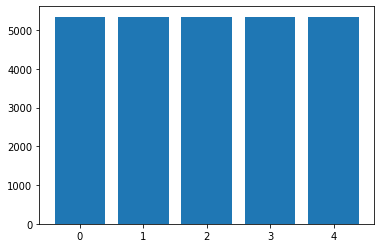

In [64]:
from matplotlib import pyplot

counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Test and Training Split and Scaling the data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)


sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))

print('Labels count in y_test:', np.bincount(y_test))

StandardScaler()

Labels count in y: [5342 5342 5342 5342 5342]
Labels count in y_train: [4273 4274 4274 4273 4274]
Labels count in y_test: [1069 1068 1068 1069 1068]


### TRAIN MODEL & CREATE PREDICTIONS USING SKLEARN - GINI CRITERION 

In [49]:
from sklearn.tree import DecisionTreeClassifier


clf_gini_d1 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 1 , splitter = 'best')
clf_gini_d2 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 2 , splitter = 'best')
clf_gini_d3 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , splitter = 'best')
clf_gini_d4 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 4 , splitter = 'best')
clf_gini_d5 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 5 , splitter = 'best')
clf_gini_d6 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 6 , splitter = 'best')


#developing a model with gini 

clf_gini_d1 = clf_gini_d1.fit(X_train_std,y_train)
clf_gini_d2 = clf_gini_d2.fit(X_train_std,y_train)
clf_gini_d3 = clf_gini_d3.fit(X_train_std,y_train)
clf_gini_d4 = clf_gini_d4.fit(X_train_std,y_train)
clf_gini_d5 = clf_gini_d5.fit(X_train_std,y_train)
clf_gini_d6 = clf_gini_d6.fit(X_train_std,y_train)



In [50]:
pred_gini_d1 = clf_gini_d1.predict(X_test_std)
pred_gini_d2 = clf_gini_d2.predict(X_test_std)
pred_gini_d3 = clf_gini_d3.predict(X_test_std)
pred_gini_d4 = clf_gini_d4.predict(X_test_std)
pred_gini_d5 = clf_gini_d5.predict(X_test_std)
pred_gini_d6 = clf_gini_d6.predict(X_test_std)


### TRAIN MODEL & CREATE PREDICTIONS USING SKLEARN - ENTROPY CRITERION 

In [51]:
clf_en_d1 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 1 , splitter = 'best')
clf_en_d2 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 2 , splitter = 'best')
clf_en_d3 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3 , splitter = 'best')
clf_en_d4 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4 , splitter = 'best')
clf_en_d5 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5 , splitter = 'best')
clf_en_d6 = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 6 , splitter = 'best')

clf_en_d1 = clf_en_d1.fit(X_train_std,y_train)
clf_en_d2 = clf_en_d2.fit(X_train_std,y_train)
clf_en_d3 = clf_en_d3.fit(X_train_std,y_train)
clf_en_d4 = clf_en_d4.fit(X_train_std,y_train)
clf_en_d5 = clf_en_d5.fit(X_train_std,y_train)
clf_en_d6 = clf_en_d6.fit(X_train_std,y_train)



In [ ]:
pred_en_d1 = clf_en_d1.predict(X_test_std)
pred_en_d2 = clf_en_d2.predict(X_test_std)
pred_en_d3 = clf_en_d3.predict(X_test_std)
pred_en_d4 = clf_en_d4.predict(X_test_std)
pred_en_d5 = clf_en_d5.predict(X_test_std)
pred_en_d6 = clf_en_d6.predict(X_test_std)

## Create  GINICLASSFICATION REPORT USING SKLEARN

In [67]:
from sklearn.metrics import classification_report

print('-------------------------------------CLASSICATION REPORT [Differnt heights]------------------------')
print('')
print('')
print('ml_gini=1',classification_report(y_test,pred_gini_d1,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

print('###################################################################################################')
print('')
print('')
print('ml_gini=2',classification_report(y_test,pred_gini_d2,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

print('###################################################################################################')
print('')
print('')
print('ml_gini=3',classification_report(y_test,pred_gini_d3,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_gini=4',classification_report(y_test,pred_gini_d4,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_gini=5',classification_report(y_test,pred_gini_d5,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_gini=6',classification_report(y_test,pred_gini_d6,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

-------------------------------------CLASSICATION REPORT [Differnt heights]------------------------


ml_gini=1               precision    recall  f1-score   support

  Defacement       0.00      0.00      0.00      1069
      benign       0.46      0.93      0.61      1068
     malware       0.00      0.00      0.00      1068
    phishing       0.00      0.00      0.00      1069
        spam       0.34      1.00      0.50      1068

    accuracy                           0.39      5342
   macro avg       0.16      0.39      0.22      5342
weighted avg       0.16      0.39      0.22      5342

###################################################################################################


ml_gini=2               precision    recall  f1-score   support

  Defacement       0.34      0.57      0.43      1069
      benign       0.62      0.93      0.75      1068
     malware       0.00      0.00      0.00      1068
    phishing       0.56      0.30      0.39      1069
        spam    

/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## Create ENTROPY CLASSFICATION REPORT USING SKLEARN

In [68]:
from sklearn.metrics import classification_report

print('-------------------------------------ENTROPY CLASSICATION REPORT [Differnt heights]------------------------')
print('')
print('')
print('ml_en=1',classification_report(y_test,pred_en_d1,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

print('###################################################################################################')
print('')
print('')
print('ml_en=2',classification_report(y_test,pred_gini_d2,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

print('###################################################################################################')
print('')
print('')
print('ml_en=3',classification_report(y_test,pred_gini_d3,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_en=4',classification_report(y_test,pred_gini_d4,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_en=5',classification_report(y_test,pred_gini_d5,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))


print('###################################################################################################')
print('')
print('')
print('ml_en=6',classification_report(y_test,pred_gini_d6,target_names=['Defacement','benign', 'malware', 'phishing', 'spam']))

-------------------------------------ENTROPY CLASSICATION REPORT [Differnt heights]------------------------


ml_en=1               precision    recall  f1-score   support

  Defacement       0.00      0.00      0.00      1069
      benign       0.46      0.93      0.61      1068
     malware       0.00      0.00      0.00      1068
    phishing       0.00      0.00      0.00      1069
        spam       0.34      1.00      0.50      1068

    accuracy                           0.39      5342
   macro avg       0.16      0.39      0.22      5342
weighted avg       0.16      0.39      0.22      5342

###################################################################################################


ml_en=2               precision    recall  f1-score   support

  Defacement       0.34      0.57      0.43      1069
      benign       0.62      0.93      0.75      1068
     malware       0.00      0.00      0.00      1068
    phishing       0.56      0.30      0.39      1069
        spam

/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# ANSWER : As the depth of the tree increases , the accuracy of prediction increases

### VISUALIZING A TREE [for numpy , depth =2)

<Figure size 1080x720 with 0 Axes>

[Text(418.5, 453.0, 'X[68] <= 0.195\ngini = 0.8\nsamples = 21368\nvalue = [4273, 4274, 4274, 4273, 4274]'),
 Text(209.25, 271.8, 'X[19] <= -0.43\ngini = 0.683\nsamples = 8492\nvalue = [1554, 3953, 1070, 1915, 0]'),
 Text(104.625, 90.59999999999997, 'gini = 0.52\nsamples = 2246\nvalue = [947, 1, 65, 1233, 0]'),
 Text(313.875, 90.59999999999997, 'gini = 0.552\nsamples = 6246\nvalue = [607, 3952, 1005, 682, 0]'),
 Text(627.75, 271.8, 'X[64] <= 0.265\ngini = 0.749\nsamples = 12876\nvalue = [2719, 321, 3204, 2358, 4274]'),
 Text(523.125, 90.59999999999997, 'gini = 0.736\nsamples = 7457\nvalue = [2544, 247, 1742, 2118, 806]'),
 Text(732.375, 90.59999999999997, 'gini = 0.514\nsamples = 5419\nvalue = [175, 74, 1462, 240, 3468]')]

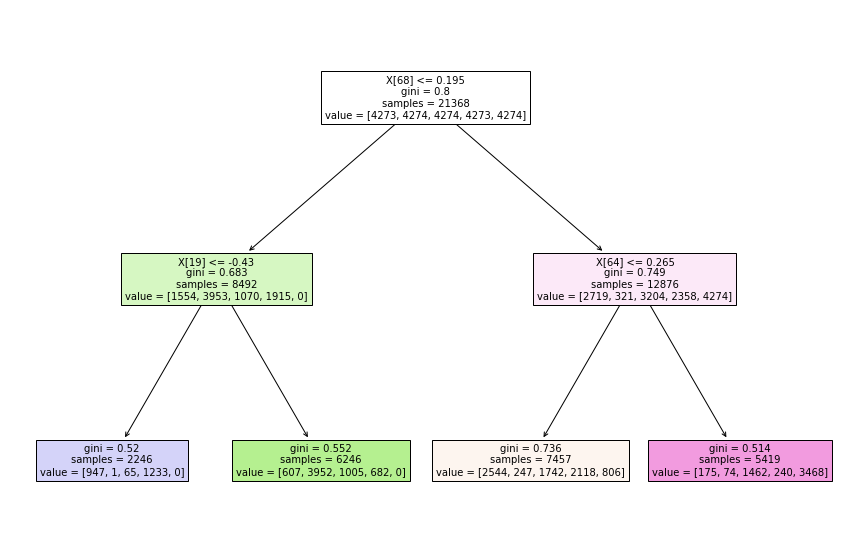

In [69]:

import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini_d2,filled='true')